In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
APD_2013 = "APD_Data/2013_APD_Traffic_Fatalities.csv"
APD_2014 = "APD_Data/2014_APD_Traffic_Fatalities.csv"
APD_2015 = "APD_Data/2015_APD_Traffic_Fatalities.csv"
APD_2016 = "APD_Data/2016_APD_Traffic_Fatalities.csv"
APD_2017 = "APD_Data/2017_APD_Traffic_Fatalities.csv"
APD_2018 = "APD_Data/2018_APD_Traffic_Fatality_Data_021219.csv"


APD_2013_df = pd.read_csv(APD_2013)
APD_2014_df = pd.read_csv(APD_2014)
APD_2015_df = pd.read_csv(APD_2015)
APD_2016_df = pd.read_csv(APD_2016)
APD_2017_df = pd.read_csv(APD_2017)
APD_2018_df = pd.read_csv(APD_2018)

In [3]:
APD_2013_df = APD_2013_df.drop(['FATAL CRASH #', 'Related','CASE NUMBER', 'speed', 'AREA',  'FTSRA','Ran Red Light', 'TYPE OF ROAD'], axis=1)
APD_2013_df = APD_2013_df.rename(columns={"LOCATION": "Location",  'restraint or helmet': 'Restraint Type', 'XCOORD': 'X COORD', 'YCOORD': 'Y COORD', 'Killed: Driver/Pass':'Victim', 'SUSPECTED IMPAIRMENT': 'Suspected Impairment'})

APD_2014_df = APD_2014_df.drop(['FATAL CRASH #', 'CASE NUMBER', 'Ran Red Light', 'Speeding','AREA', 'Related', 'FTSRA', 'TYPE OF ROAD', 'Charge'], axis=1)
APD_2014_df = APD_2014_df.rename(columns={'TYPE': "Type","LOCATION": "Location", 'restraint or helmet': 'Restraint Type', 'Killed: Driver/Pass':'Victim', 'SUSPECTED IMPAIRMENT': 'Suspected Impairment'})

APD_2015_df = APD_2015_df.drop(['FATAL CRASH #', 'CASE NUMBER', 'Ran Red Light', 'AREA', 'Related', 'FTSRA', 'TYPE OF ROAD', 'charge', 'Speeding'], axis=1)
APD_2015_df = APD_2015_df.rename(columns={'TYPE': "Type","LOCATION": "Location",  'restraint or helmet': 'Restraint Type','Killed: driver/pass':'Victim', 'DL Status':'Drivers License Status','SUSPECTED IMPAIRMENT': 'Suspected Impairment'})


APD_2016_df = APD_2016_df.drop(['FATAL CRASH Number', 'Ran Red Light or Stop Sign','CASE NUMBER', 'Speeding', 'AREA', 'Related', 'Ran Red Light or Stop Sign','FTSRA',  'TYPE OF ROAD',  'Victim', 'charge'], axis=1)
APD_2016_df = APD_2016_df.rename(columns={'TYPE': "Type","LOCATION": "Location",'restraint or helmet': 'Restraint Type', 'COORD X' : 'X COORD','DL Status':'Drivers License Status','SUSPECTED IMPAIRMENT': 'Suspected Impairment'})


APD_2017_df = APD_2017_df.drop(['Fatal crash number','Charge', 'DL status incident ', 'Related','Speeding','Ran red light or stop sign', 'Case Number','Ran red light or stop sign', 'Area', 'Type of road', 'Failure to stop and render aid', ],axis=1)
APD_2017_df = APD_2017_df.rename(columns={'Restraint helmet': 'Restraint Type', 'X coord' : 'X COORD', 'Y coord': 'Y COORD', 'Killed driver pass': 'Victim','DL status incident':'Drivers License Status'})


APD_2018_df = APD_2018_df.drop(['Fatal Crash Number','Ran Red Light or Stop Sign','Case Number', 'Area', 'Speeding', 'Case Status','Ran Red Light or Stop Sign', 'Failure to stop and render aid', 'Related', 'charge', 'Type of road'],axis=1)
APD_2018_df = APD_2018_df.rename(columns={ 'Restraint type': 'Restraint Type', 'X coord':'X COORD', 'Y coord': 'Y COORD', 'Killed driver pass': 'Victim','DL Status incident':'Drivers License Status'})


In [4]:
all_merged_df1 = pd.merge(APD_2013_df, APD_2014_df, how='outer')

all_merged_df2 = pd.merge(all_merged_df1, APD_2015_df, how='outer')

all_merged_df3 = pd.merge(all_merged_df2, APD_2016_df, how='outer')

all_merged_df4 = pd.merge(all_merged_df3, APD_2017_df, how='outer')

all_merged_df = pd.merge(all_merged_df4, APD_2018_df, how='outer')

In [5]:
#Calulate Percentages
restraints = all_merged_df['Restraint Type'].replace({"seatbelts worn": "seatbelt worn", "no seatbelts": "no seatbelt","yes": "seatbelt worn", "worn, but came off": "seatbelt worn",  "no seatbelt/ 1 worn": "no seatbelt", "no seatbelt (passenger)/ 3 worn": "no seatbelt", "no helmet (bike)": "no helmet", "no helmet (not strapped)": "no helmet", " no helmet": "no helmet", "helmet worn": "helmet"})
restraint_tot = restraints.value_counts()

seat_belt = (restraint_tot["seatbelt worn"]/(restraint_tot["seatbelt worn"]+restraint_tot["no seatbelt"]))*100
no_seat_belt = (restraint_tot["no seatbelt"]/(restraint_tot["seatbelt worn"]+restraint_tot["no seatbelt"]))*100

In [6]:
helmet_worn = (restraint_tot["helmet"]/(restraint_tot["helmet"]+restraint_tot["no helmet"]))*100
no_helmet = (restraint_tot["no helmet"]/(restraint_tot["helmet"]+restraint_tot["no helmet"]))*100


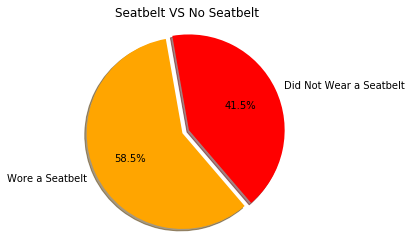

In [7]:
seatbelt_percentages = [seat_belt, no_seat_belt]
labels = ["Wore a Seatbelt", "Did Not Wear a Seatbelt"]
colors = ["orange", "red"]
explode= (.075, 0)

plt.pie(seatbelt_percentages, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=100)
plt.title("Seatbelt VS No Seatbelt")
plt.axis("equal")
plt.savefig("Seatbelt_VS_No_Seatbelt.png")
plt.show()